In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def plot(time, amplitudes, title, xlabel, ylabel):
    fig = plt.figure(figsize=(25,10))
    ax = plt.axes()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    ax.plot(time, amplitudes)
    plt.show()

### 1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie.

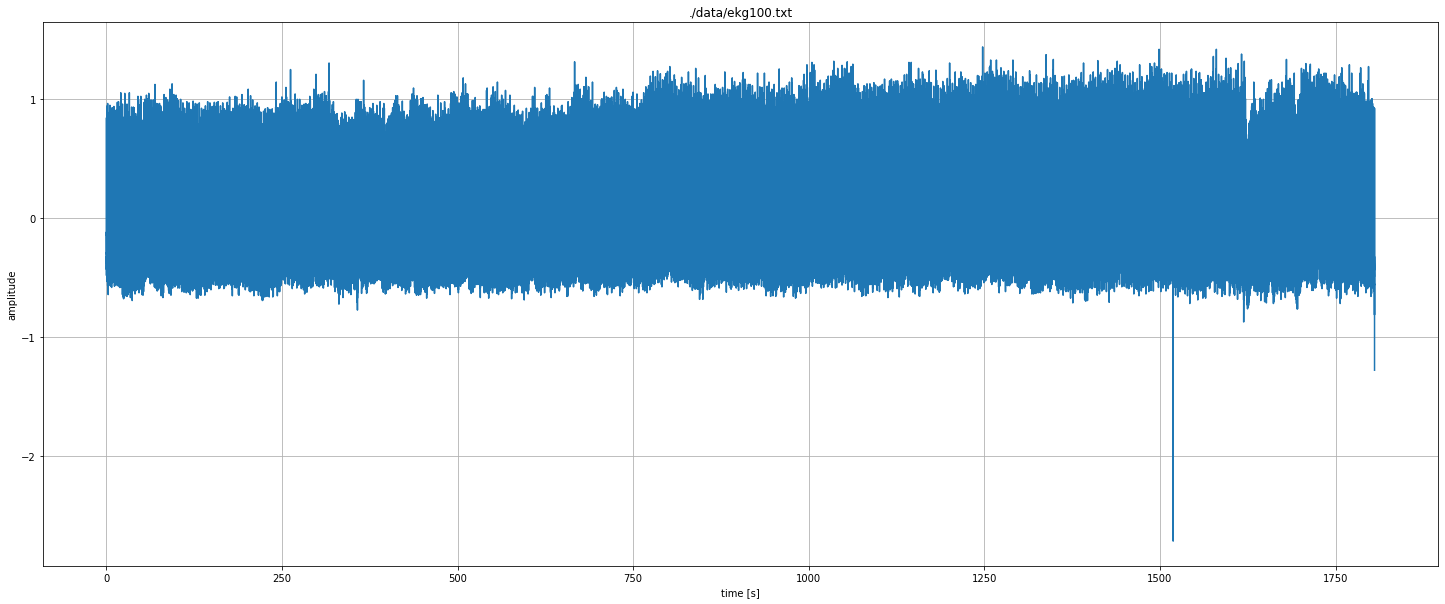

In [26]:
fs = 360 

file = './data/ekg100.txt'
data = np.loadtxt(file)
measurements = len(data)
amplitudes = data
time = [x / fs for x in range(measurements)]

plot(time, amplitudes, file, 'time [s]', 'amplitude')

### 2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

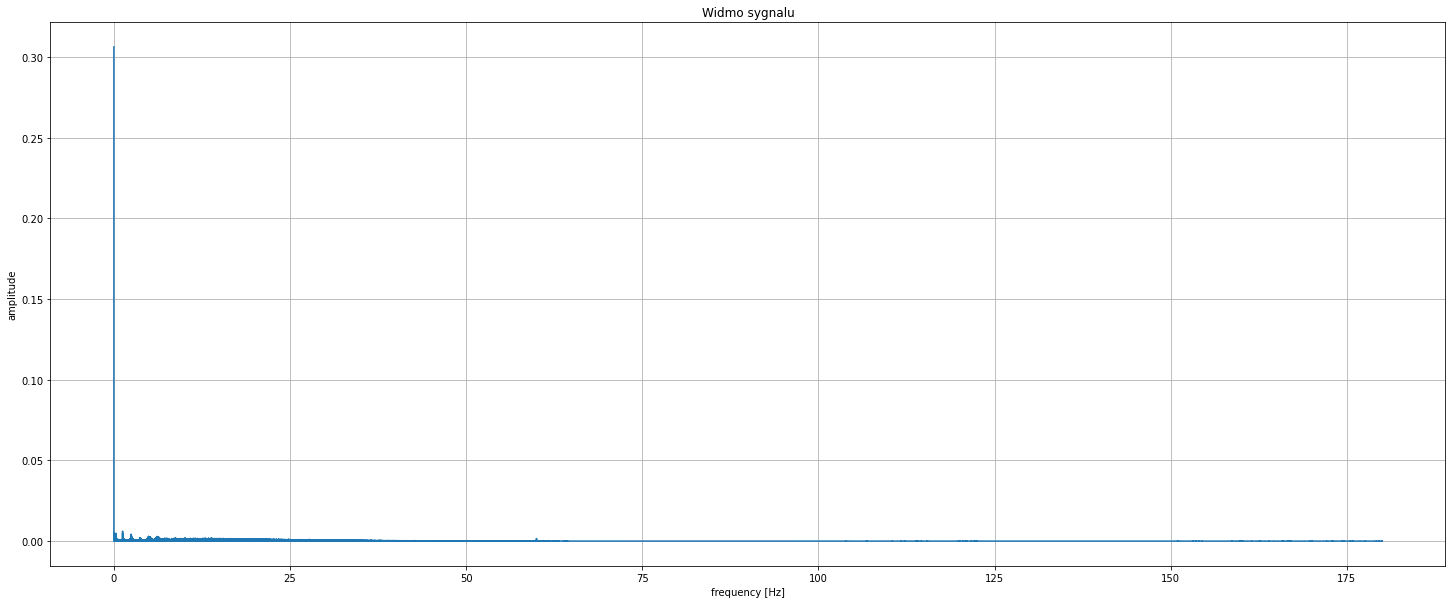

In [27]:
length = len(amplitudes)
fft = np.fft.fft(amplitudes) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo sygnalu', 'frequency [Hz]', 'amplitude')

### 3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ekg100 (można wyznaczyć różnicę sygnałów).

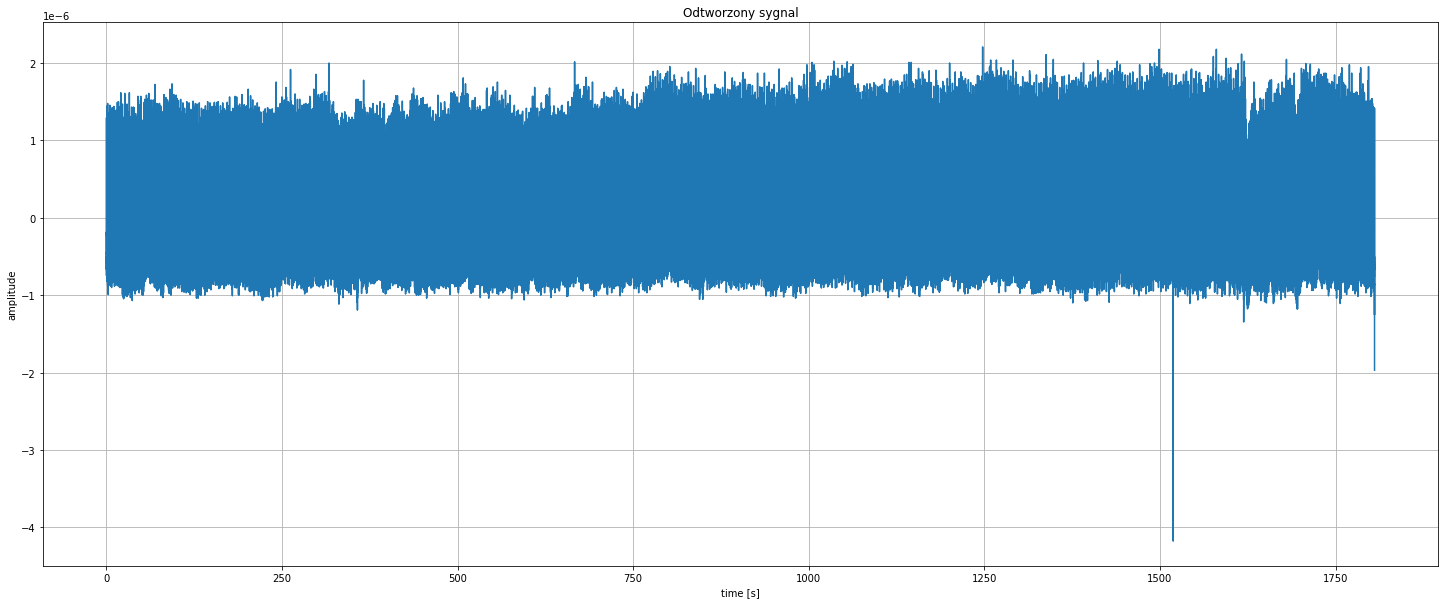

In [28]:
reversed_amplitudes = np.fft.ifft(fft).real

plot(time, reversed_amplitudes, f'Odtworzony sygnal', 'time [s]', 'amplitude')

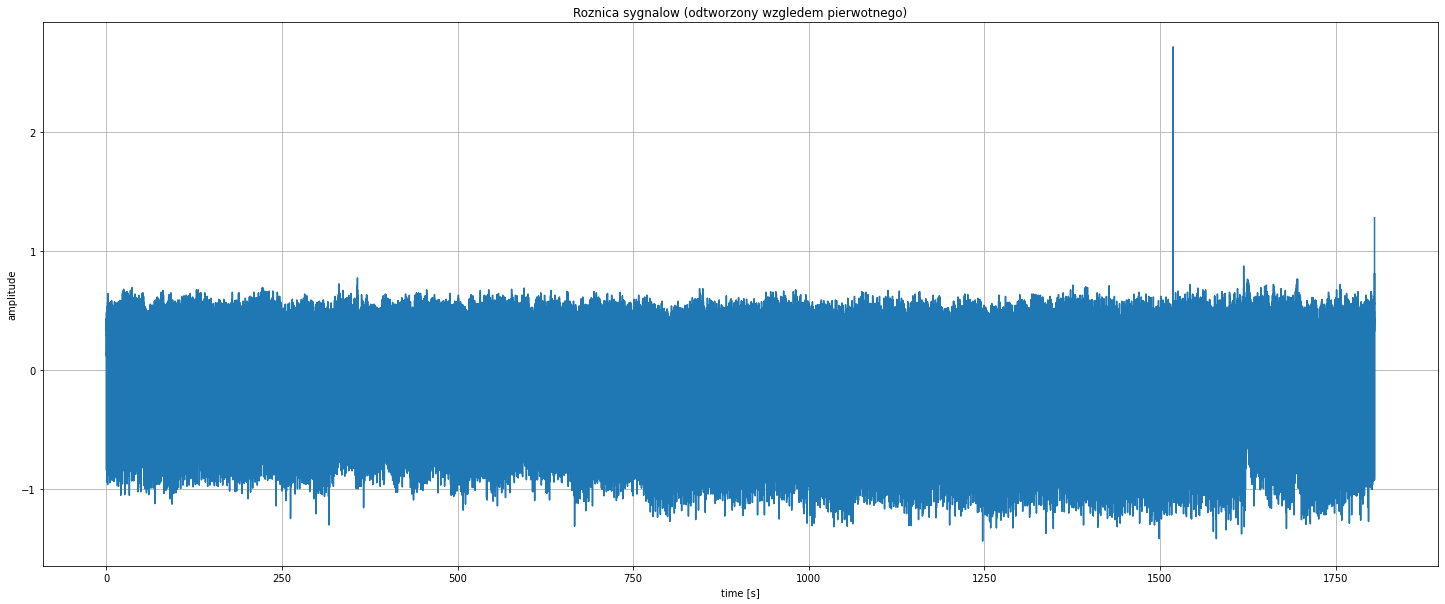

In [29]:
diff = reversed_amplitudes - amplitudes

plot(time, diff, f'Roznica sygnalow (odtworzony wzgledem pierwotnego)', 'time [s]', 'amplitude')